<a href="https://colab.research.google.com/github/conorwa/Torque_Project/blob/main/Torque_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv('Torque_db_12100.csv')

In [ ]:
for x in dataset.index:
  if dataset.loc[x, "Torque"] > 1:
    dataset.drop(x, inplace = True)

In [ ]:
# shape and data types of the data
print(dataset.shape)
print(dataset.dtypes)

(928, 5)
CarrierID      int64
NestID         int64
WinderID       int64
SpindleID      int64
Torque       float64
dtype: object


In [ ]:
# select numeric columns
df_numeric = dataset.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = dataset.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['CarrierID' 'NestID' 'WinderID' 'SpindleID' 'Torque']
[]


In [ ]:
# Run to see if there is any missing entries in the dataset
# Before any outliers have been removed
for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

CarrierID - 0%
NestID - 0%
WinderID - 0%
SpindleID - 0%
Torque - 0%


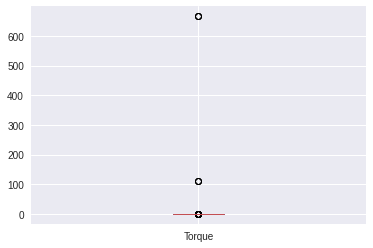

In [ ]:
# Run for a basic Box Plot on the Torque column of the dataset
# Before any outliers have been removed
dataset.boxplot(column=['Torque'])

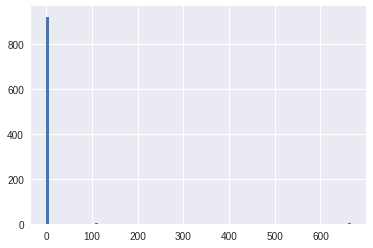

In [ ]:
# Run an Hisotgram on the Torque column of the dataset
# Before any outliers have been removed
dataset['Torque'].hist(bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


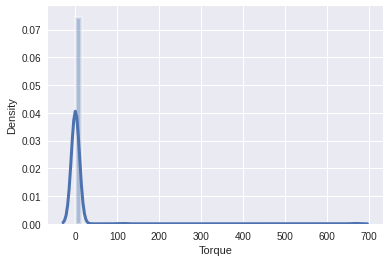

In [ ]:
# Run a distribution Plot on the Torque column of the dataset
# Before any outliers have been removed
ax = sns.distplot(dataset.Torque, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X.shape)
print(dataset.head)

(928, 4)
<bound method NDFrame.head of      CarrierID  NestID  WinderID  SpindleID    Torque
0           10       1         7       3003  0.571323
1           10       2         7       3509  0.562675
2           10       3         7       3004  0.518944
3           10       4         7       3510  0.534952
4           10       5         7       3005  0.536280
..         ...     ...       ...        ...       ...
923         22       4         6       3510  0.566502
924         22       5         6       3005  0.511414
925         22       6         6       3501  0.535449
926         22       7         6       3006  0.602768
927         22       8         6       3502  0.542356

[928 rows x 5 columns]>


In [ ]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X).toarray()

In [ ]:
print(X)
print(X.shape)
print(dataset.head)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(928, 64)
<bound method NDFrame.head of      CarrierID  NestID  WinderID  SpindleID    Torque
0           10       1         7       3003  0.571323
1           10       2         7       3509  0.562675
2           10       3         7       3004  0.518944
3           10       4         7       3510  0.534952
4           10       5         7       3005  0.536280
..         ...     ...       ...        ...       ...
923         22       4         6       3510  0.566502
924         22       5         6       3005  0.511414
925         22       6         6       3501  0.535449
926         22       7         6       3006  0.602768
927         22       8         6       3502  0.542356

[928 rows x 5 columns]>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=42
)

In [ ]:
lr = LinearRegression().fit(X_test, y_test)
lr1 = LinearRegression().fit(X_train, y_train)

In [ ]:
r_sq = lr.score (X_test, y_test)
print('r_sq', r_sq)
r_sq1 = lr1.score (X_train, y_train)
print('r_sq', r_sq1)

r_sq 0.19193978025710878
r_sq 0.10198968356755067


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Coefficients: \n', lr.coef_)


Coefficients: 
 [-8.44468798e-03 -6.25140288e-03  3.22239546e-02 -7.34610215e-03
  1.51920757e-02  1.44869589e-02 -1.74047318e-02  2.90386387e-02
 -3.76521782e-03  9.82379904e-03 -8.55814107e-03 -6.96717719e-03
 -4.74777345e-02 -1.97484074e-02  1.16545399e-03 -4.19067340e-02
  9.30692710e-04 -4.62838096e-03 -3.83794152e-02  6.84660507e-03
 -6.53328454e-03  3.81290843e-02 -2.82548896e-02 -2.25147388e-02
 -1.06976317e-02 -2.09527634e-02  6.84520966e-03 -3.89310654e-02
 -4.29967294e-02 -3.37027454e-02 -2.06211473e+12  6.50813376e+12
 -5.77582159e+12  9.32585753e+12 -2.06211473e+12  6.50813376e+12
 -5.77582159e+12  9.32585753e+12  5.06426898e+12  5.06426898e+12
  5.06426898e+12  5.06426898e+12  5.06426898e+12  5.06426898e+12
  4.23932414e+12  7.95303100e+12  4.23932414e+12  7.95303100e+12
  4.23932414e+12  7.95303100e+12  4.23932414e+12  7.95303100e+12
  4.23932414e+12  7.95303100e+12 -4.33092435e+12 -7.14864812e+12
 -4.33092435e+12 -7.14864812e+12 -4.33092435e+12 -7.14864812e+12
 -4.33092

In [ ]:
for x in dataset.index:
  if dataset.loc[x, "Torque"] > 1:
    dataset.drop(x, inplace = True)

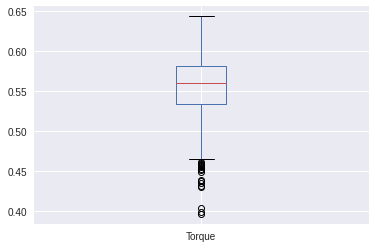

In [ ]:
# Run for a basic Box Plot on the Torque column of the dataset
# After outliers have been removed
dataset.boxplot(column=['Torque'])

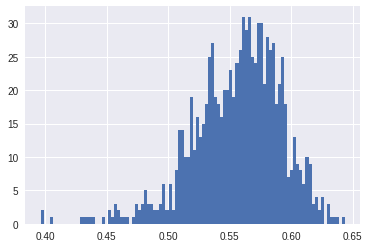

In [ ]:
# Run an Hisotgram on the Torque column of the dataset
# After outliers have been removed
dataset['Torque'].hist(bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


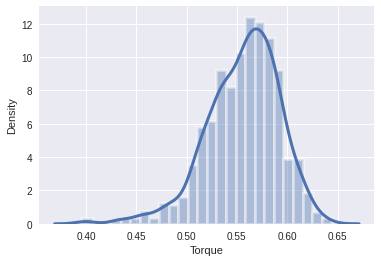

In [ ]:
# Run a distribution Plot on the Torque column of the dataset
# After outliers have been removed
ax = sns.distplot(dataset.Torque, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=42
)

In [ ]:
lr = LinearRegression().fit(X_test, y_test)

In [ ]:
r_sq = lr.score (X_test, y_test)
print('r_sq', r_sq)

r_sq 0.19193978025710878


In [ ]:
rf = RandomForestRegressor (n_estimators=100, random_state=0)
rf.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.01


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.68 %.


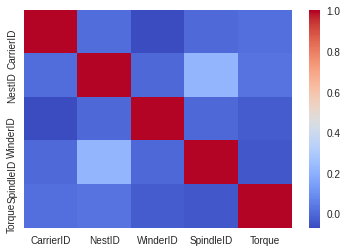

In [ ]:
plt.figure()
sns.heatmap(dataset.corr(), cmap='coolwarm')
plt.show()
